<a href="https://colab.research.google.com/github/siddharthachhabra/PyTorch/blob/main/iris_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [29]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))
    return x


In [30]:
torch.manual_seed(41)
model = Model()

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [32]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [33]:
my_df['variety'] = my_df['variety'].replace('Setosa',0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor',1.0)
my_df['variety'] = my_df['variety'].replace('Virginica',2.0)

In [34]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [35]:
X = my_df.drop('variety', axis=1)
Y = my_df['variety']

In [36]:
X = X.values
Y = Y.values

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=41)

In [39]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [41]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [44]:
epochs = 100
losses = []
for i in range(epochs):
  Y_pred = model.forward(X_train)
  loss = criterion(Y_pred, Y_train)

  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} and loss : {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss : 1.125203251838684
Epoch: 10 and loss : 1.0097211599349976
Epoch: 20 and loss : 0.8516881465911865
Epoch: 30 and loss : 0.6555687189102173
Epoch: 40 and loss : 0.45029518008232117
Epoch: 50 and loss : 0.2718472480773926
Epoch: 60 and loss : 0.1553877890110016
Epoch: 70 and loss : 0.09336269646883011
Epoch: 80 and loss : 0.06463461369276047
Epoch: 90 and loss : 0.05066271126270294


Text(0.5, 0, 'Epoch')

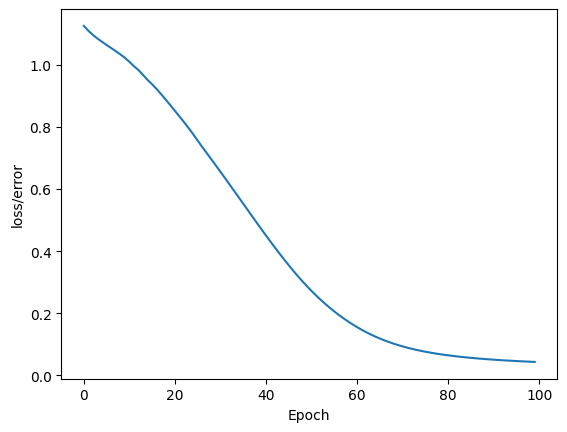

In [45]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [46]:
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, Y_test)

In [47]:
loss

tensor(0.1295)